# Actividad 6
###### Alberto Benavides


En esta ocasión se determinará cuándo un grafo no es plano a través de cliques y el teorema de Kuratowski para el caso de $K_5$. Con el uso de la librería [NetworkX](https://networkx.github.io/) y las ${5 \choose 2}$ combinaciones de cinco nodos generadas con la librería [itertools](https://docs.python.org/3/library/itertools.html) se puede diseña un grafo $K_5$ al añadir aristas entre cada par de nodos de dicho grafo.

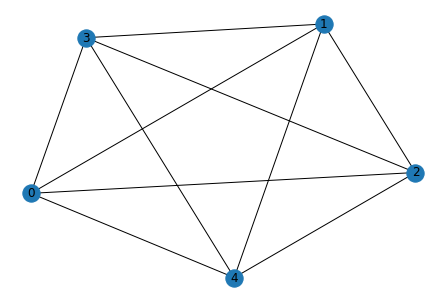

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint, random
from itertools import combinations, chain

K = nx.Graph()
K.add_nodes_from(range(5))
K.add_edges_from(combinations(K.nodes, 2))

plt.figure()
nx.draw(K, with_labels=True)

Una de las condiciones para que un grafo no sea plano es que no contenga un subgrafo isomorfo de este grafo $K_5$. Una manera de determinar esta condición es a través de cliques, pues el grafo $K_5$ contiene un clique máximo formado por todos sus nodos. De esta forma, si un un grafo se encuentra un clique de 5 nodos, dicho grafo no sería plano.

Ahora bien, se desarrollará un algoritmo para determinar los cliques y cliques máximos de un grafo. Inicialmente, se generará un grafo de $n$ nodos que tienen probabilidad $p$ de tener aristas con cualquier otro nodo.

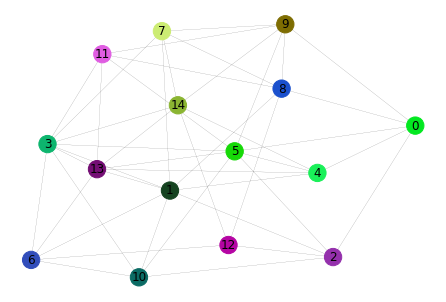

In [47]:
p = 0.5
n = 15

G = nx.Graph()
G.add_nodes_from(range(n))
colors = [(random(), random(), random()) for _i in range(n)]

for i in range(n):
    for j in range (i, n):
        if i != j and random() < p:
            G.add_edge(i, j)

options = {
    'node_size': 300,
    'width': 0.1
}

plt.figure()
# https://stackoverflow.com/a/8083655
nx.draw(G, with_labels=True, node_color=colors, **options)

Dado que un clique C es cualquier grafo cuyos nodos pertenezcan a un grafo G si y sólo si cada par de nodos de C tiene una arista entre sí que pertenece también a G, se puede determinar la cantidad de cliques en un grafo al explorar los subconjuntos de sus nodos, por lo que encontrar los cliques de un grafo se considera un problema de complejidad $\mathcal{O}(2^n)$. Para encontrar todos los subconjuntos de un grafo G dado, se usa la función de `powerset` definida en la documentación de [itertools](https://docs.python.org/3/library/itertools.html#itertools-recipes), la cual devuelve una concatenación de todas las combinaciones de un conjunto de valores (en esta caso, todos los nodos de $G$).

In [ ]:
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
combinaciones = list(powerset(G.nodes))

A partir de los subconjuntos de nodos en el grafo G, se pueden definir los cliques siguiendo la definición ya dada. Como hay que recorrer dos veces todos los nodos de todos los subconjuntos del grafo $G$, la complejidad computacional de encontrar los cliques de un nodo es $\mathcal{O}(2^n + n^2)$. 

Por otro lado, los cliques máximos son aquellos que no son subconjuntos de otros cliques del grafo $G$. Encontrar los cliques máximos implica haber encontrado todos los cliques y comparar cada clique con los demás para determinar cuáles no son subconjutos de los demás cliques, lo que sería un algoritmo de complejidad $\mathcal{O}(n^2)$, pero que puede simplificarse a $\mathcal{o}(n)$

In [48]:
# Reverso de la lista
combinaciones = combinaciones[::-1]

In [49]:
cliques = []
max_cliques = []
# Por cada combinación
for i in combinaciones:
    es_clique = True
    C = nx.Graph()
    for j in i:
        for k in i:
            if j != k and not G.has_edge(j, k):
                es_clique = False
            else:
                C.add_nodes_from((j, k))
                C.add_edge(j, k)
    if es_clique and len(C.nodes) > 0:
        cliques.append(C)
        if len(cliques) == 1:
            max_cliques.append(C)
        else:
            es_max_clique = True
            for x in cliques:
                if C != x:
                    t = set(C.nodes)
                    t1 = set(x.nodes)
                    if t.issubset(t1):
                        es_max_clique = False
            if es_max_clique:
                max_cliques.append(C)

<ipython-input-50-a09c06ea8c31>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


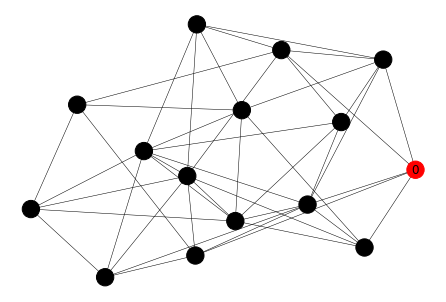

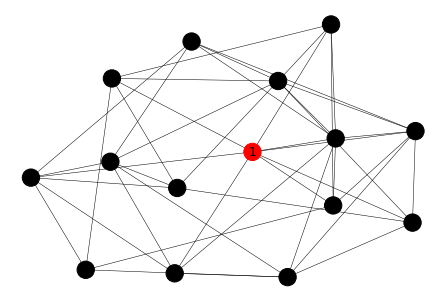

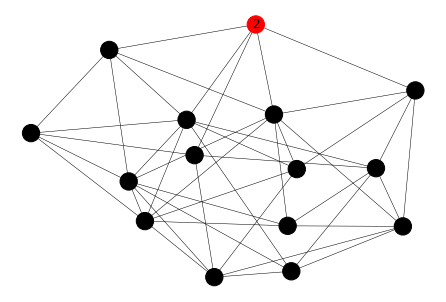

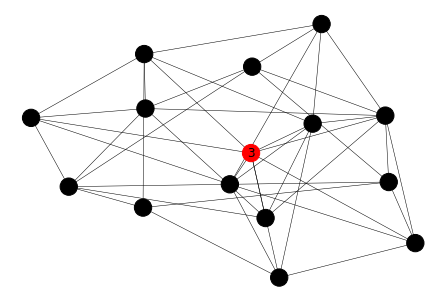

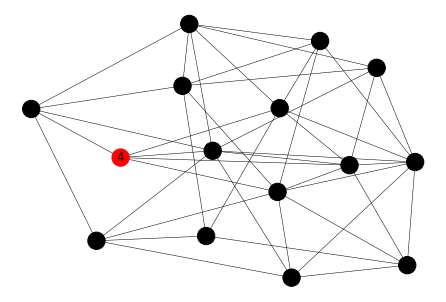

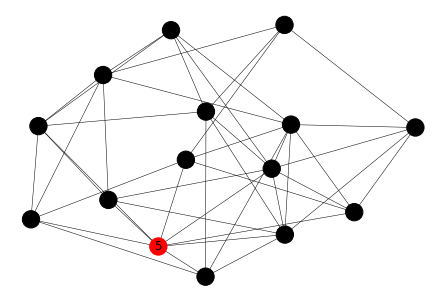

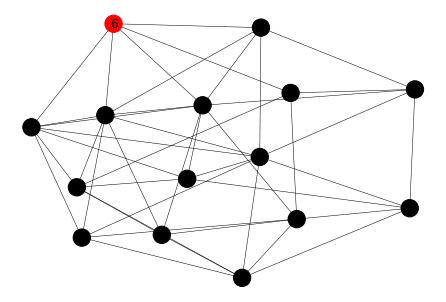

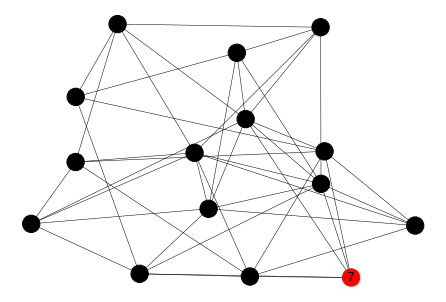

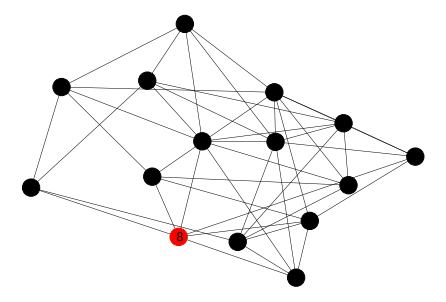

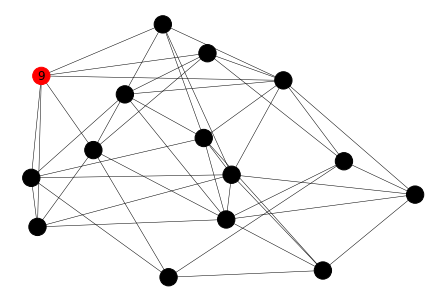

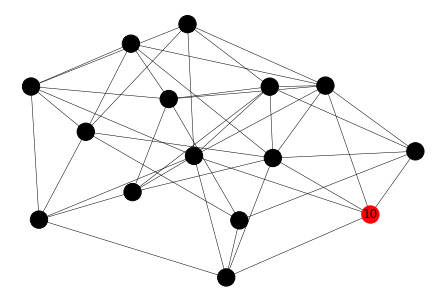

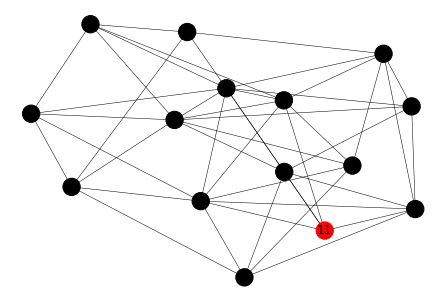

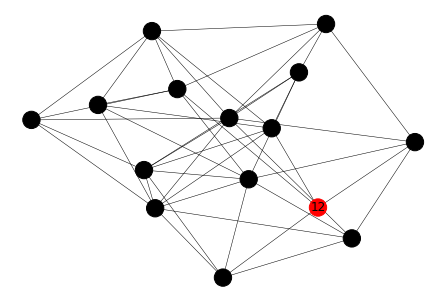

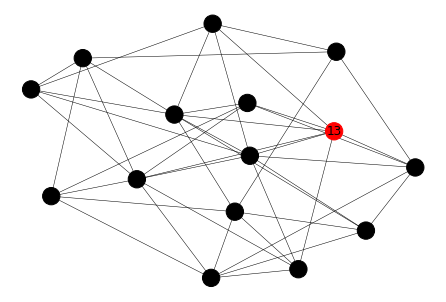

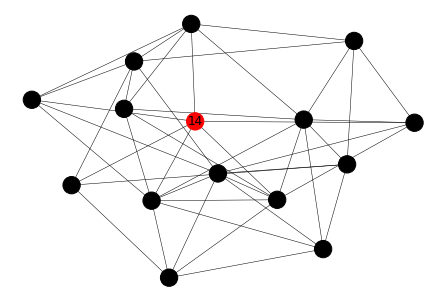

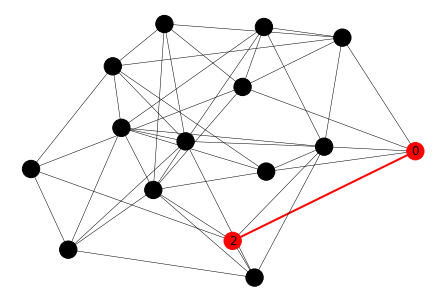

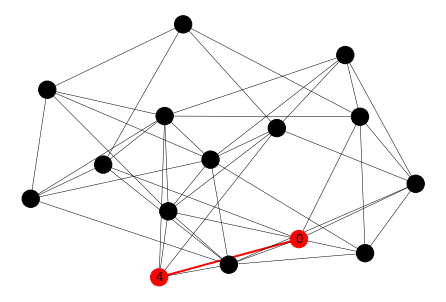

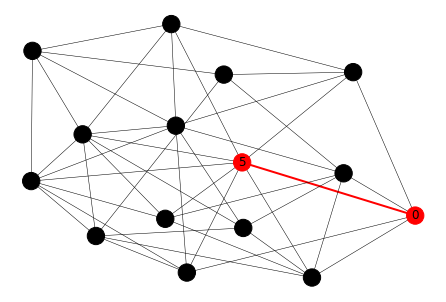

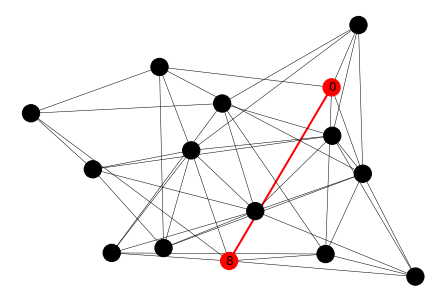

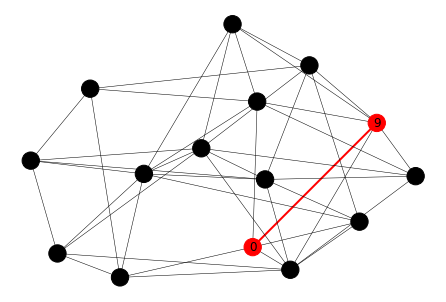

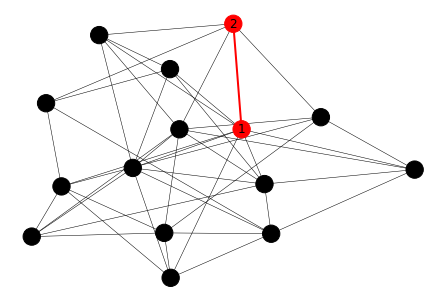

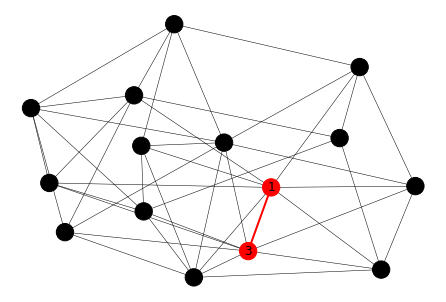

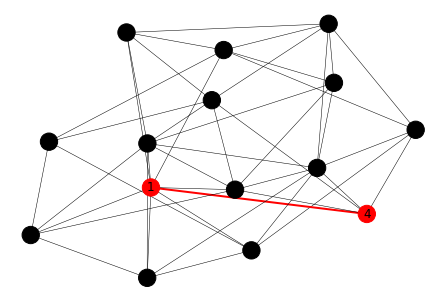

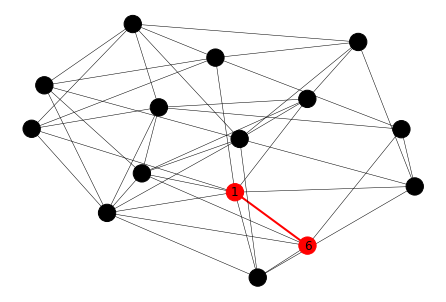

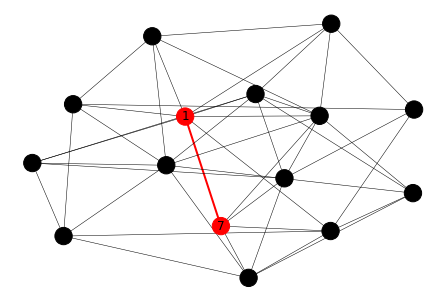

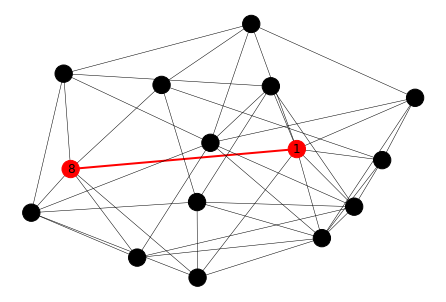

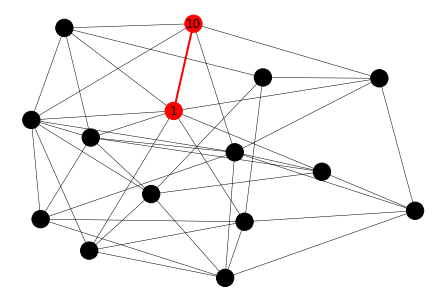

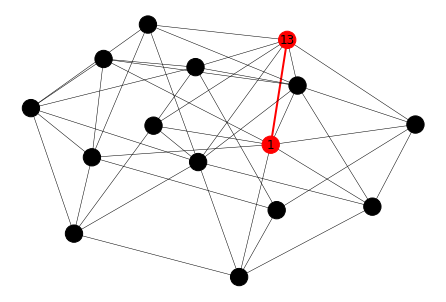

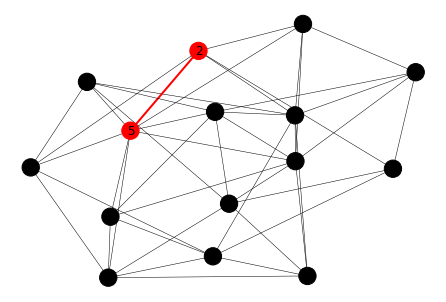

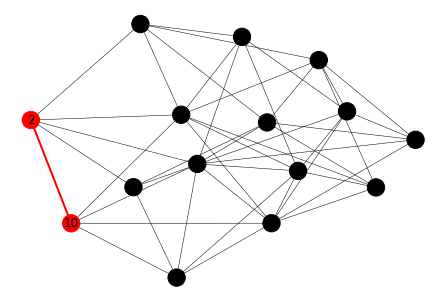

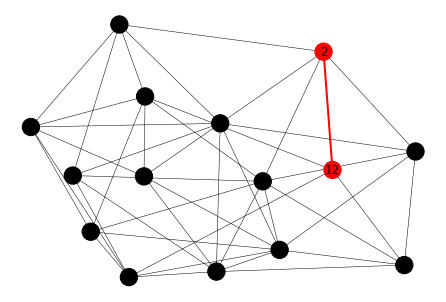

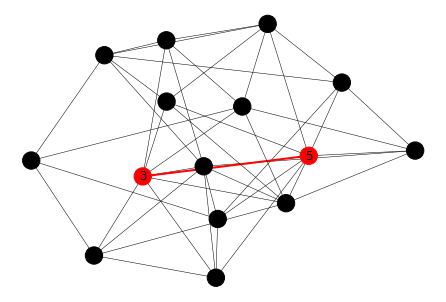

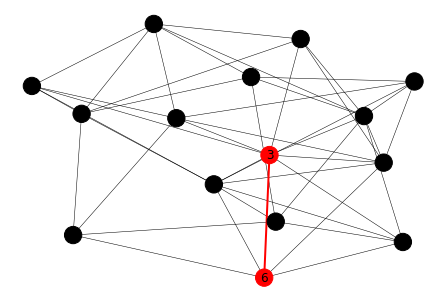

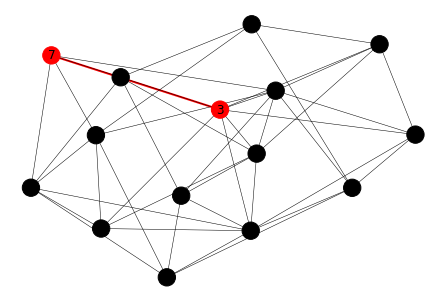

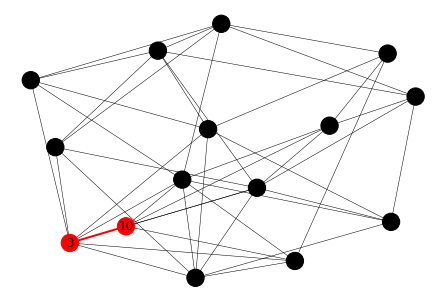

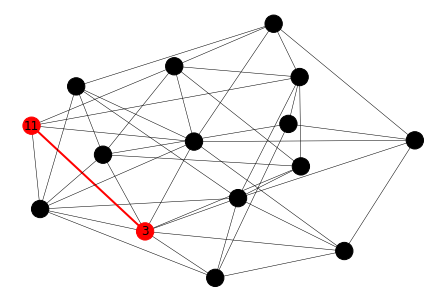

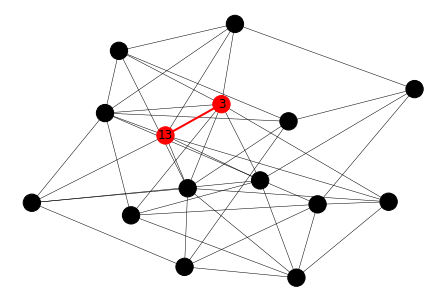

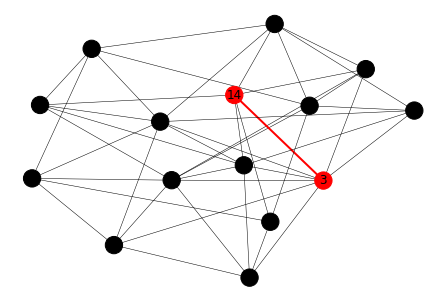

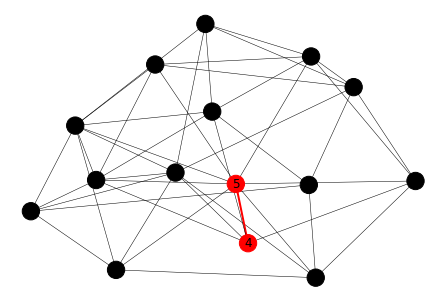

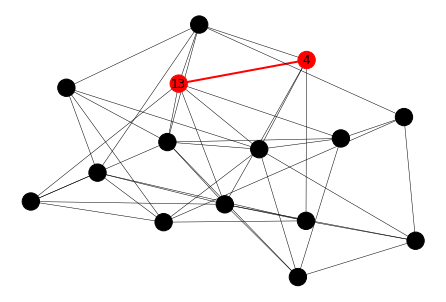

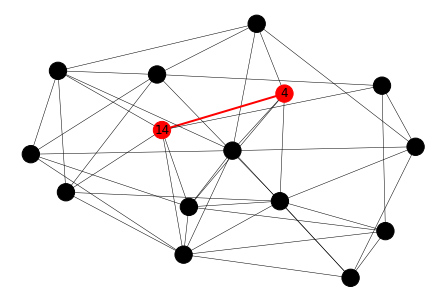

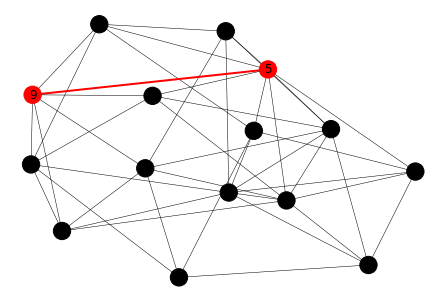

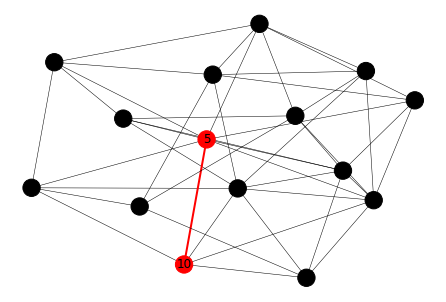

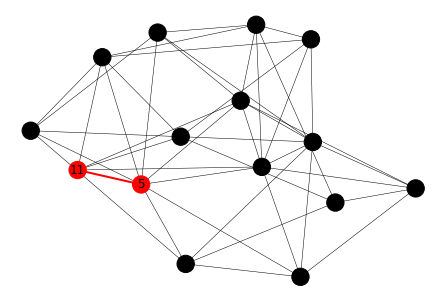

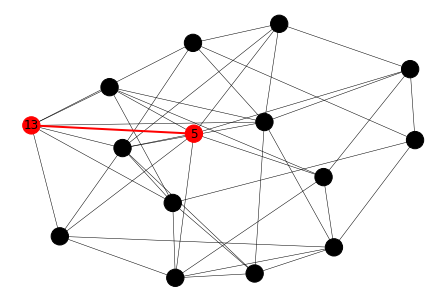

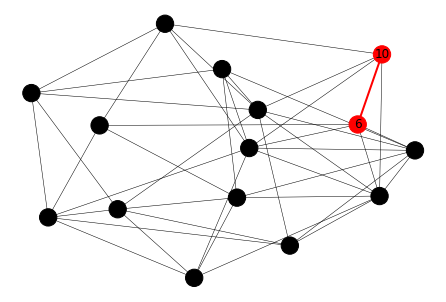

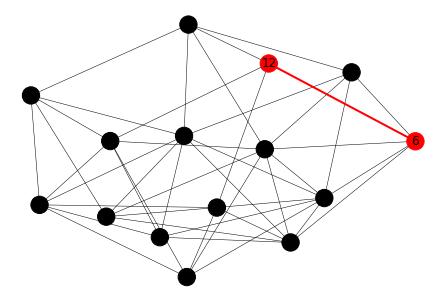

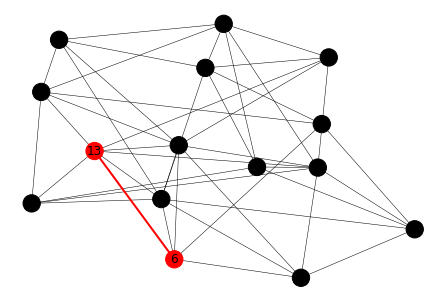

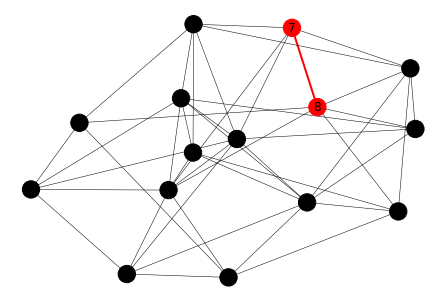

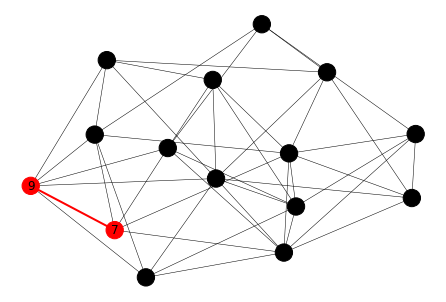

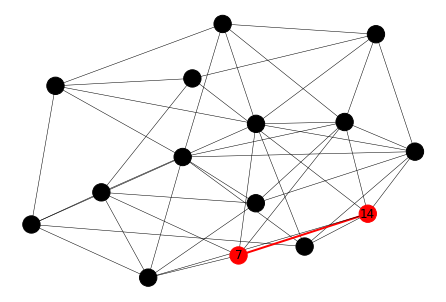

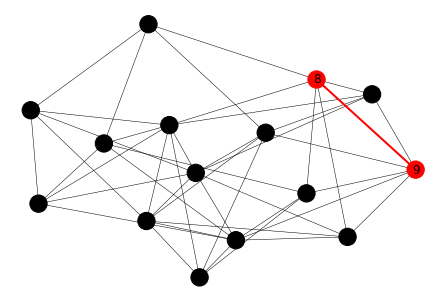

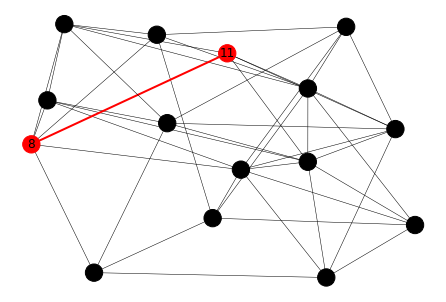

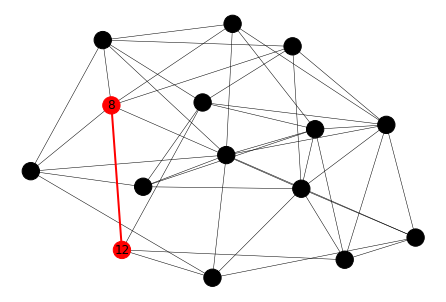

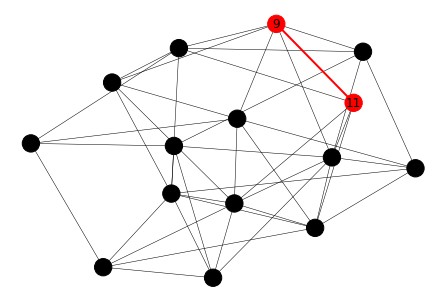

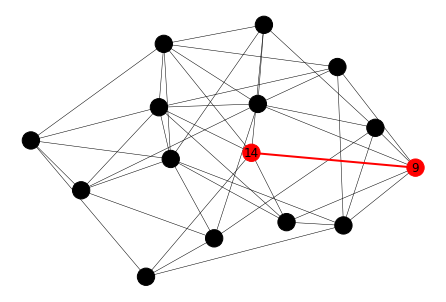

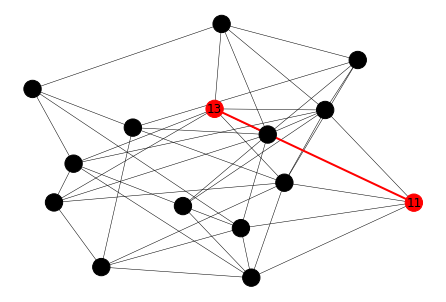

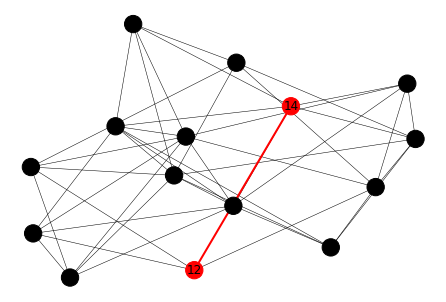

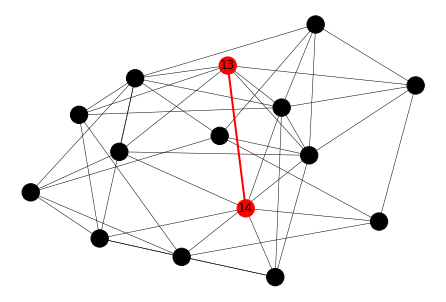

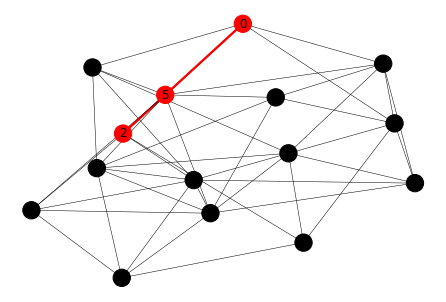

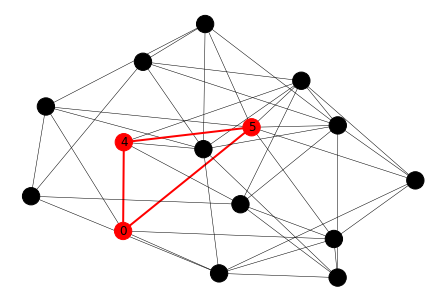

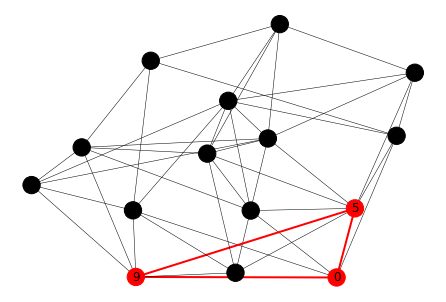

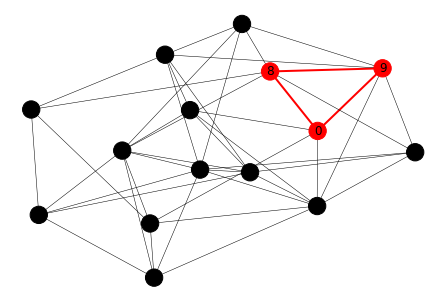

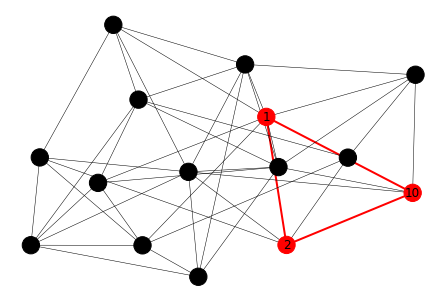

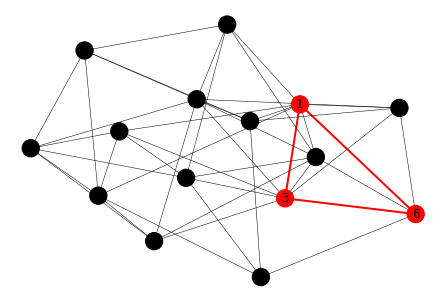

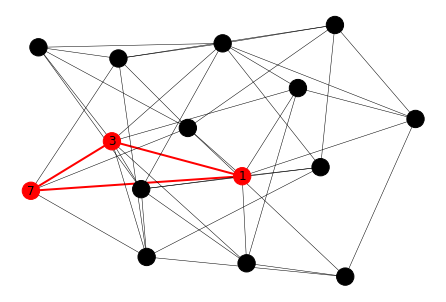

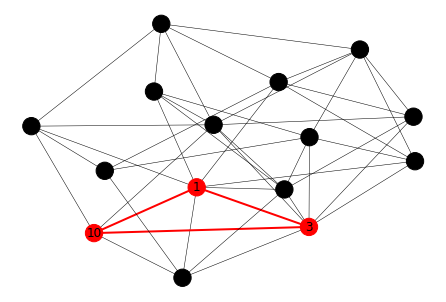

In [ ]:
for C in max_cliques:
    C_colors = []
    for i in G.nodes:
        if i in C.nodes:
            C_colors.append('red')
        else:
            C_colors.append('black')
    edges = G.edges()
    edge_colors = []
    weights = []
    for i, j in G.edges:
        if C.has_edge(i, j):
            edge_colors.append('red')
            weights.append(2)
        else:
            edge_colors.append('black')
            weights.append(0.5)
    plt.figure()
    # https://stackoverflow.com/a/8083655
    nx.draw(G, with_labels=True, node_color=C_colors, edge_color=edge_colors, node_size=300, width=weights)